In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

In [174]:
dataset = pd.read_csv('water_potability.csv')

In [175]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [176]:
dataset.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [177]:
print("Number of features in the dataset: ", dataset.shape[1])
print("Number of records in the dataset: ", dataset.shape[0])

Number of features in the dataset:  10
Number of records in the dataset:  3276


In [178]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [179]:
# Records with Nan values in all the features
records = dataset[dataset.Sulfate.isnull() & dataset.ph.isnull() & dataset.Trihalomethanes.isnull()]
records

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
141,NaN,167.386127,20944.620814,4.963124,NaN,566.339294,11.318807,NaN,3.679795,0
201,NaN,229.771350,16162.262307,4.933662,NaN,448.846036,8.816487,NaN,4.600928,0
387,NaN,143.300200,16263.167465,6.229737,NaN,503.664085,19.585497,NaN,3.451740,1
646,NaN,221.620058,11954.700730,6.657053,NaN,391.238714,12.961433,NaN,3.282061,0
929,NaN,202.079864,12519.090660,7.627524,NaN,399.883388,12.748217,NaN,4.439215,0
992,NaN,226.765646,39942.953898,8.594715,NaN,538.621803,13.744749,NaN,4.863378,0
2065,NaN,184.993731,19764.627445,7.505092,NaN,293.477998,12.934160,NaN,3.017985,0
3062,NaN,209.531697,44982.734155,8.898024,NaN,349.385235,15.653299,NaN,3.832479,0
3067,NaN,193.091260,17777.100086,6.087949,NaN,543.114953,10.717588,NaN,3.878664,0


In [180]:
# Delete records from the dataset
dataset = dataset.drop(index = records.index, axis = 0)

In [181]:
print("Number of records in the new dataset: ", dataset.shape[0])

Number of records in the new dataset:  3267


In [182]:
dataset.isnull().sum()

ph                 482
Hardness             0
Solids               0
Chloramines          0
Sulfate            772
Conductivity         0
Organic_carbon       0
Trihalomethanes    153
Turbidity            0
Potability           0
dtype: int64

In [183]:
print('Median of ph value: ', dataset['ph'].median()) 
print('Median of Sulfate value: ', dataset['Sulfate'].median())
print('Median of Trihalomethanes value: ', dataset['Trihalomethanes'].median())

Median of ph value:  7.036752103833548
Median of Sulfate value:  333.073545745888
Median of Trihalomethanes value:  66.62248509808484


In [184]:
dataset['ph'] = dataset['ph'].fillna(dataset['ph'].median())
dataset['Sulfate'] = dataset['Sulfate'].fillna(dataset['Sulfate'].median())
dataset['Trihalomethanes'] = dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].median())

dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [185]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [186]:
features = dataset.drop('Potability', axis = 1)
label = dataset.Potability

In [187]:
features.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [188]:
train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size = 0.25, random_state = 12)

In [189]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
model = RandomForestClassifier(n_estimators = 450)
model.fit(train_features, train_labels)
predicted = model.predict(test_features)

importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_indices

array([0, 4, 1, 3, 2, 6, 5, 8, 7], dtype=int64)

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predicted) 

0.6744186046511628

Visualization

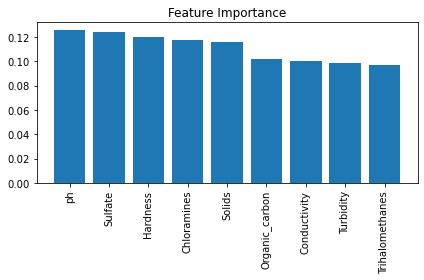

In [191]:
plt.title('Feature Importance')
plt.bar(range(train_features.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(train_features.shape[1]), train_features.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

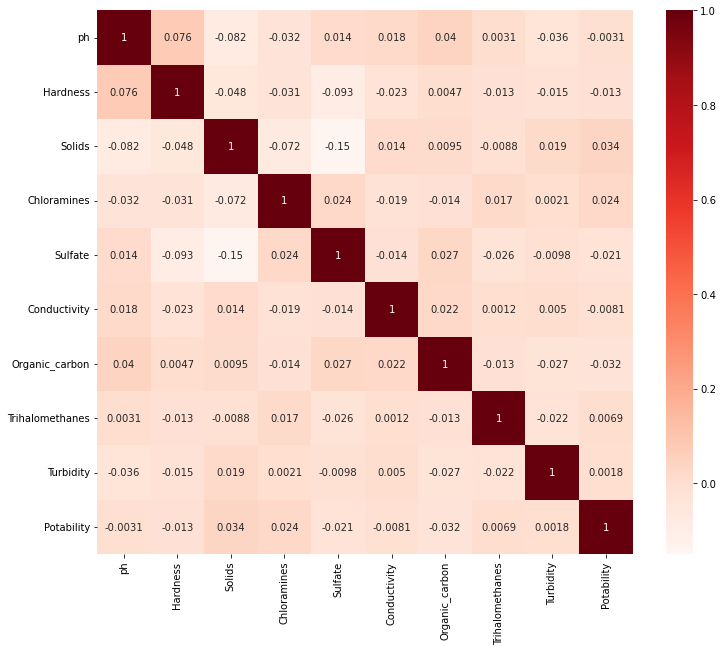

In [192]:
import seaborn as sns

plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [193]:
from keras.models import Sequential
from keras.layers import Dense

In [194]:
neural_model = Sequential()
neural_model.add(Dense(32, input_dim = 9, activation='relu')) ##hidden layer 1
neural_model.add(Dense(64, activation='relu')) ##hidden layer 2
neural_model.add(Dense(1, activation='sigmoid'))

In [195]:
neural_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [197]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
neural_model.summary()

Training Features Shape: (2450, 9)
Training Labels Shape: (2450,)
Testing Features Shape: (817, 9)
Testing Labels Shape: (817,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                320       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [198]:
neural_model.fit(features,label, epochs=10)

Epoch 1/10
103/103 [==============================] - 1s 3ms/step - loss: 0.3912 - accuracy: 0.6088
Epoch 2/10
103/103 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.6097
Epoch 3/10
103/103 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.5751
Epoch 4/10
103/103 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.3909
Epoch 5/10
103/103 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.3909
Epoch 6/10
103/103 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.3909
Epoch 7/10
103/103 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.3909
Epoch 8/10
103/103 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.3909
Epoch 9/10
103/103 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.3909
Epoch 10/10
103/103 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.3909

In [199]:
scores = neural_model.evaluate(test_features, test_labels)
print(scores) ##returns loss and accuracy

26/26 [==============================] - 6s 2ms/step - loss: 0.6083 - accuracy: 0.3917
[0.6083231568336487, 0.3916768729686737]
